# Kruskalův algoritmus

Kruskalův algoritmus lze použít pro nalezení minimální kostry grafu. Algoritmus nejprve seřadí hrany grafu dle jejich ohodnocení. Následně tyto hrany zkouší přidat do kostry tak, aby po přidání hrany nevznikl v dosavadní kostře cyklus. Pokud cyklus po přidání hrany do kostry nevznikne, je přidaná hrana součástí minimální kostry grafu. V opačném případě, kdy by po přidání hrany do kostry vznikl cyklus a tím by došlo k porušení vlastností kostry, hrana není přidána. Při přidávání hrany nemusíme testovat přítomnost cyklu, postačí zjistit, zdali přidávaná hrana spojuje různé komponenty souvislosti.

V průběhu algoritmu testujeme hrany, zdali s nimi incidentní vrcholy patří do jedné či dvou komponent souvislosti. Tento problém se nazývá Union&Find. Union&Find problém je realizován dvěma operacemi, kterými jsou UNION, která sjednocuje dvě komponenty souvislosti, a FIND, která vrátí reprezentanta komponenty souvislosti pro daný vrchol grafu. Reprezentanta vybereme pro každou komponentu souvislosti pouze jednoho, tohoto reprezentanta sdílejí všechny vrcholy dané komponenty souvislosti.

# Import potřebných knihoven

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Třída pro vytvoření a vykreslení grafu a nalezení minimální kostry

In [2]:
class Graph:
    # init metoda s definovanými vrcholy
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []
        self.G = nx.Graph()
        
    # metoda pro přidání hrany do grafu
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
        self.G.add_edge(u, v, weight=w)
    
    # metoda pro vizualizaci grafu
    def visGraph(self):
        self.pos = nx.spring_layout(self.G, seed = 4)
        nx.draw_networkx_nodes(self.G, self.pos, node_size = 700)
        nx.draw_networkx_edges(self.G, self.pos, edgelist = self.G.edges, width=6)
        self.visLabels()
    
    # metoda pro vykreslení grafu se zvýrazněnou minimální kostrou
    def visMinimalGraph(self, edges):
        self.visGraph()
        nx.draw_networkx_edges(g.G, self.pos, edgelist=edges, width=6, edge_color="c")
        self.visLabels()
    
    # metoda pro olablování grafu (z důvodu duplicitního kódu)
    def visLabels(self):
        nx.draw_networkx_labels(self.G, self.pos, font_size=20, font_family="sans-serif")
        labels = nx.get_edge_attributes(self.G, 'weight')
        nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels = labels)        

    # metoda pro vyhledávání
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
 
    # metoda pro spojení x a y
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
 
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
            
    # Kruskalův algoritmus pro nalezení minimální kostry grafu
    def kruskal(self):
 
        result = []
         
        # index seřazených hran
        i = 0
         
        # index výsledných hran
        e = 0
 
        # seřazení hran dle váhy
        self.graph = sorted(self.graph, key=lambda item: item[2])
 
        parent = []
        rank = []
 
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
 
        # počet výsledných hran se musí rovnat počtu vrcholů -1
        while e < self.V - 1:
 
            # Uložení hrany s nejmenší váhou
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
 
        # uložení a vrácení výsledku
        minimumGraph = []
        for u, v, weight in result:
            minimumGraph.append([u, v])
        return minimumGraph           

# Uživatelské vstupy (vrcholy číslované od 0):

In [3]:
nodes = input("Počet vrcholů: ")
g = Graph(int(nodes))

edges = input("Počet hran: ")

i = 0
while i < int(edges):
    node_u = input("Počáteční uzel hrany: ")
    node_v = input("Cílový uzel hrany: ")
    weight = input("Váha hrany: ")
    i = i+1
    g.addEdge(int(node_u), int(node_v), int(weight))

Počet vrcholů: 6
Počet hran: 7
Počáteční uzel hrany: 0
Cílový uzel hrany: 1
Váha hrany: 15
Počáteční uzel hrany: 0
Cílový uzel hrany: 2
Váha hrany: 10
Počáteční uzel hrany: 0
Cílový uzel hrany: 3
Váha hrany: 10
Počáteční uzel hrany: 0
Cílový uzel hrany: 4
Váha hrany: 5
Počáteční uzel hrany: 4
Cílový uzel hrany: 5
Váha hrany: 5
Počáteční uzel hrany: 5
Cílový uzel hrany: 2
Váha hrany: 5
Počáteční uzel hrany: 3
Cílový uzel hrany: 1
Váha hrany: 5


# Graf dle zadání uživatele

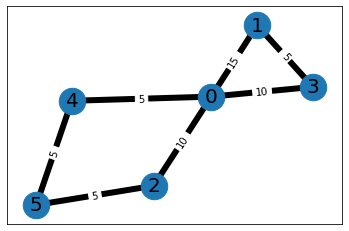

In [4]:
g.visGraph()
plt.show()

# Minimální kostra grafu

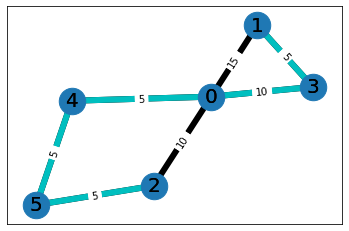

In [5]:
minimumGraphEdges = g.kruskal()
g.visMinimalGraph(minimumGraphEdges)
plt.show()